<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> پروژه کلاسی یادگیری عمیق جهاد دانشگاهی دانشگاه شریف  </div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">  این پروژه با استفاده از مفهوم انتقال یادگیری انجام شده است </h1>


<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> در این پروژه 44 تصویر از خودرو پژو 206 و 39 تصویر از خودرو سمند از زوایای مختلف با بک گراندهای مختلف و نور پس زمینه مختلف برای دیتای "آموزشی" جمع آوری شده است    </h1>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> همچنین 15 تصویر از خودرو پژو 206 و 18 تصویر از خودرو سمند (تقریبا به اندازه 30% داده های آموزشی) از زوایای مختلف با بک گراندهای مختلف و نور پس زمینه مختلف برای دیتای "تست و اعتباررسنجی" جمع آوری شده است</h1>

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

<div style="direction:rtl;text-align:right;font-family:Tahoma">
کدها  برگرفته از نت بوک یادگیری انتقالی شماره 13 جناب آقای مهندس اخوان پور میباشد
</div>



In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
original_dataset_dir = 'D:/Deep Learning/DataSet/cars'
import os, shutil
import numpy as np

print(os.getcwd())

D:\Deep Learning\DataSet


In [5]:
import os, shutil
import numpy as np
import sys
from keras.preprocessing.image import ImageDataGenerator

base_dir = "./cars"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 83)
validation_features, validation_labels = extract_features(test_dir, 33)
test_features, test_labels = extract_features(test_dir, 33)

Found 83 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [7]:
train_features = np.reshape(train_features, (83, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (33, 4 * 4 * 512))
test_features = np.reshape(test_features, (33, 4 * 4 * 512))

In [8]:
##  Vgg  به بک شبکه  FC  داده شده است خروجی شبکه 

from keras import models

from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 83 samples, validate on 33 samples
Epoch 1/30
83/83 [==============================] - 3s 41ms/step - loss: 0.7272 - acc: 0.5542 - val_loss: 0.6752 - val_acc: 0.5758
Epoch 2/30
83/83 [==============================] - 0s 5ms/step - loss: 0.7621 - acc: 0.5181 - val_loss: 0.6808 - val_acc: 0.6061
Epoch 3/30
83/83 [==============================] - 0s 5ms/step - loss: 0.6964 - acc: 0.5783 - val_loss: 0.6395 - val_acc: 0.6364
Epoch 4/30
83/83 [==============================] - 0s 5ms/step - loss: 0.6460 - acc: 0.6024 - val_loss: 0.6411 - val_acc: 0.6970
Epoch 5/30
83/83 [==============================] - 0s 4ms/step - loss: 0.6201 - acc: 0.6506 - val_loss: 0.6569 - val_acc: 0.6061
Epoch 6/30
83/83 [==============================] - 0s 4ms/step - loss: 0.6506 - acc: 0.6627 - val_loss: 0.6189 - val_acc: 0.6970
Epoch 7/30
83/83 [==============================] - 0s 4ms/step - loss: 0.5871 - acc: 0.7229 - val_loss: 0.6312 - val_acc: 0.6667
Epoch 8/30
83/83 [===========================

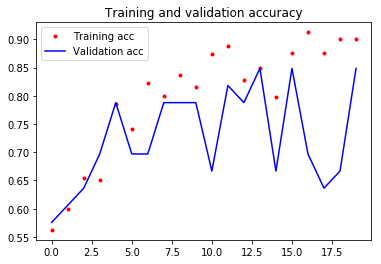

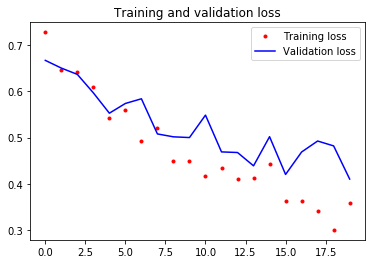

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r.', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### شبکه Transfer Learning  از شبکه کانولوشنی بهتر عمل مینماید 
####مشکل این است که بیش برازش یا overfit داریم
####  drop out هم دارد
#### یک روش دیگر استفاده از دیتا Augmentation بود 
## ولی در این شبکه وزن های آموزش داده وجود دارند
### 

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
### conv base همان شبکه Vgg 16 است که به عنوان یک لایه در این شبکه دیده شده است 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [12]:
conv_base.trainable = False
### این دستور برای این است که وزن های vgg  را تغییر ندهد 

In [13]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [14]:
######## Augmentation  استفاده از  ########

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=3,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=3,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=27,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=11,
      verbose=2)

Found 83 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Epoch 1/20
 - 90s - loss: 0.7278 - acc: 0.5618 - val_loss: 0.6671 - val_acc: 0.5758
Epoch 2/20
 - 90s - loss: 0.6462 - acc: 0.6048 - val_loss: 0.6505 - val_acc: 0.6061
Epoch 3/20
 - 89s - loss: 0.6427 - acc: 0.6543 - val_loss: 0.6368 - val_acc: 0.6364
Epoch 4/20
 - 86s - loss: 0.6104 - acc: 0.6542 - val_loss: 0.5968 - val_acc: 0.6970
Epoch 5/20
 - 90s - loss: 0.5465 - acc: 0.7780 - val_loss: 0.5527 - val_acc: 0.7879
Epoch 6/20
 - 89s - loss: 0.5598 - acc: 0.7407 - val_loss: 0.5738 - val_acc: 0.6970
Epoch 7/20
 - 78s - loss: 0.4896 - acc: 0.8211 - val_loss: 0.5839 - val_acc: 0.6970
Epoch 8/20
 - 84s - loss: 0.5227 - acc: 0.7964 - val_loss: 0.5078 - val_acc: 0.7879
Epoch 9/20
 - 83s - loss: 0.4485 - acc: 0.8394 - val_loss: 0.5015 - val_acc: 0.7879
Epoch 10/20
 - 87s - loss: 0.4500 - acc: 0.8148 - val_loss: 0.4999 - val_acc: 0.7879
Epoch 11/20
 - 83s - loss: 0.4230 - acc: 0.8705 - val_loss: 0.5485 - val_acc: 0

 <div style="direction:rtl;text-align:right;font-family:Tahoma">
ترسیم مقدار
Augentation پس از استفاده از   acc
</div>

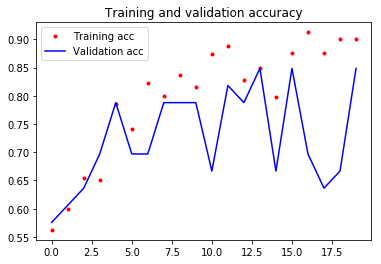

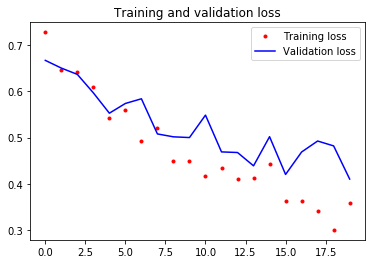

In [16]:
### همانطور که ملاحظه میشود پس از این روش acc  افزایش و خطا کاهش میابد ، دقت پیش بینی افزایش میابد
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r.', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 <div style="direction:rtl;text-align:right;font-family:Tahoma">
بنظر میرسد یکی از دلایل پایین بودن دقت مدل در این مساله، وجود داده های محدود و تصاویری با زوایا و کیفیت های متفاوت باشد
</div>


<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">  با تشکر از زحمات استاد جناب مهندس علیرضا اخوان پور </h1>

Linkedin Account: linkedin.com/in/sts-sadr

Researchgate Account: researchgate.net/profile/Staha_Seyedsadr

Orcid ID: 0000-0003-1249-0679

Mendely Account: mendeley.com/profiles/taha-seyedsadr2
